In [5]:
# Importando librerías
import urllib.request
import os
import pandas as pd
import numpy as np
import zipfile
import datetime
import json

## Descargando datos

In [6]:
# Definiendo url, nombres de los archivos y dirección donde se descargarán
ensu_url_1t = "https://www.inegi.org.mx/contenidos/programas/ensu/datosabiertos/conjunto_de_datos_ENSU_2022_1t_csv.zip"
ensu_archivo_1t = "ensu_2022_1t.zip"

ensu_url_2t = "https://www.inegi.org.mx/contenidos/programas/ensu/datosabiertos/conjunto_de_datos_ENSU_2022_2t_csv.zip"
ensu_archivo_2t = "ensu_2022_2t.zip"

ensu_url_3t = "https://www.inegi.org.mx/contenidos/programas/ensu/datosabiertos/conjunto_de_datos_ENSU_2022_3t_csv.zip"
ensu_archivo_3t = "ensu_2022_3t.zip"

sesnsp_url = "https://api.datamexico.org/tesseract/cubes/sesnsp_crimes/aggregate.jsonrecords?captions%5B%5D=Date.Date.Quarter.Quarter+ES&captions%5B%5D=Geography.Geography.State.State+slug+ES&captions%5B%5D=Geography.Geography.Municipality.Municipality+ES&captions%5B%5D=Type.Type.Crime+Type.Crime+Type+ES&cuts%5B%5D=Date.Date.Year.2022&drilldowns%5B%5D=Date.Date.Year&drilldowns%5B%5D=Date.Date.Quarter&drilldowns%5B%5D=Geography.Geography.State&drilldowns%5B%5D=Geography.Geography.Municipality&drilldowns%5B%5D=Type.Type.Crime+Type&measures%5B%5D=Value"
sesnsp_archivo = "sesnsp.json"

poblacion_url = "https://api.datamexico.org/tesseract/cubes/inegi_population_total/aggregate.jsonrecords?captions%5B%5D=Geography.Geography.State.State+slug+ES&captions%5B%5D=Geography.Geography.Municipality.Municipality+ES&captions%5B%5D=Sex.Sex.Sex.Sex+ES&cuts%5B%5D=Sex.Sex.Sex.2&drilldowns%5B%5D=Geography.Geography.State&drilldowns%5B%5D=Geography.Geography.Municipality&drilldowns%5B%5D=Sex.Sex.Sex&measures%5B%5D=Population"
poblacion_archivo = "poblacion.json"
subdir = "./data/"

In [7]:
# Creando lista de url y archivos para ENSU
ensu_urls = [ensu_url_1t, ensu_url_2t, ensu_url_3t]
ensu_archivos = [ensu_archivo_1t, ensu_archivo_2t, ensu_archivo_3t]

In [8]:
# Descargando datos y creando archivo .txt con la documentación correspondiente
if not os.path.exists(subdir + ensu_archivo_3t):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    for url, archivo in zip(ensu_urls, ensu_archivos):
        urllib.request.urlretrieve(url, subdir + archivo) 
        with zipfile.ZipFile(subdir + archivo, "r") as zip_ref:
            zip_ref.extractall(subdir)  
    
    urllib.request.urlretrieve(sesnsp_url, subdir + sesnsp_archivo)
    urllib.request.urlretrieve(poblacion_url, subdir + poblacion_archivo)

    with open(subdir + "info.txt", 'w') as f:
        f.write("Archivos sobre incidencia delictiva y resultados de encuesta sobre percepción de violencia\n")
        info = """
        Se decargaron datos de dos fuentes de información distintas. Por un lado, los datos de incidencias 
        delictivas a nivel estatal, agrupados por tipos de delitos, por estados y por municipios durante el
        año 2022, como fuente del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP). 
        Estos datos se obtuvieron del sitio web https://datamexico.org
        
        Por otro lado, se encuentran los datos que recogen los resultados de la Encuesta Nacional de Seguridad
        Pública Urbana (ENSU) del año 2022; información sobre la percepción de seguridad pública en la población 
        urbana. Estos resultados fueron publicados en el sitio web https://www.inegi.org.mx
        
        Por último, se encuentra la información sobre el tamaño de la población entre los diferentes municipios 
        de México. Estos datos se obtuvieron del sitio web https://datamexico.org
        """ 
        f.write(info + '\n')
        f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
        f.write("Desde: " + sesnsp_url + "\n")
        f.write("Nombre: " + sesnsp_archivo + "\n")
        f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
        f.write("Desde: " + "https://www.inegi.org.mx/programas/ensu/#Datos_abiertos" + "\n")
        f.write("Desde: " + poblacion_url + "\n")
        f.write("Nombre: " + poblacion_archivo + "\n")

## Leyendo archivos descargados

#### ENSU 2022

In [9]:
# Obteniendo datos donde se resume la información de la encuesta ensu 2022
# 1er Trimestre
dir_1t = subdir + 'conjunto_de_datos_CB_ENSU_03_2022/conjunto_de_datos/conjunto_de_datos_CB_ENSU_03_2022.csv'
df_1t = pd.read_csv(dir_1t)

# 2do Trimestre
dir_2t = subdir + 'conjunto_de_datos_CB_ENSU_06_2022/conjunto_de_datos/conjunto_de_datos_CB_ENSU_06_2022.csv'
df_2t = pd.read_csv(dir_2t)

# 3er Trimestre
dir_3t = subdir + 'conjunto_de_datos_CB_ENSU_09_2022/conjunto_de_datos/conjunto_de_datos_CB_ENSU_09_2022.csv'
df_3t = pd.read_csv(dir_3t)
df_3t.head()

,ID_VIV,ID_PER,UPM,VIV_SEL,R_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,LOC,...,BP4_5_6_7,BP4_5_6_8,BP4_5_6_9,BP5_1,FAC_VIV,FAC_SEL,DOMINIO,EST,UPM_DIS,EST_DIS
0,100071.006,0100071.006.01\r,100071,5,1,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,1,1068,1068,U\r,2,1,137
1,100071.026,0100071.026.01\r,100071,1,1,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,1,1068,1068,U\r,2,1,137
2,100071.033,0100071.033.03\r,100071,2,3,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,1,1068,3204,U\r,2,1,137
3,100071.115,0100071.115.01\r,100071,3,1,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,1,1068,2136,U\r,2,1,137
4,100075.028,0100075.028.02\r,100075,4,2,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,3,1030,3090,U\r,3,2,138


#### SESNSP 2022

In [10]:
# Obteniendo datos con la información de delitos ocurridos durante 2021
with open(subdir + sesnsp_archivo, encoding = 'utf8') as fp:
    data_sesnsp = json.load(fp)

print("\nNúmero de entradas: {}".format(len(data_sesnsp)))
print("\nNombre de los atributos: {}".format(", ".join(data_sesnsp.keys())))


Número de entradas: 2

Nombre de los atributos: data, source


In [11]:
# Convirtiendo los datos en dataframe
df_sesnsp = pd.DataFrame(data_sesnsp['data'])
df_sesnsp.head()

,Year,Quarter ID,Quarter,State ID,State,Municipality ID,Municipality,Crime Type ID,Crime Type,Value
0,2022,20221,2022-Q1,1,aguascalientes-ag,1001,Aguascalientes,101,Abuso de Confianza,139
1,2022,20221,2022-Q1,1,aguascalientes-ag,1001,Aguascalientes,102,Daño a la Propiedad,799
2,2022,20221,2022-Q1,1,aguascalientes-ag,1001,Aguascalientes,103,Despojo,58
3,2022,20221,2022-Q1,1,aguascalientes-ag,1001,Aguascalientes,104,Extorsión,10
4,2022,20221,2022-Q1,1,aguascalientes-ag,1001,Aguascalientes,105,Fraude,498


#### Tamaño de la población femenina

In [12]:
# Obteniendo datos con la información del tamaño de la población
with open(subdir + poblacion_archivo, encoding = 'utf8') as fp:
    data_poblacion = json.load(fp)

print("\nNúmero de entradas: {}".format(len(data_poblacion)))
print("\nNombre de los atributos: {}".format(", ".join(data_poblacion.keys())))


Número de entradas: 2

Nombre de los atributos: data, source


In [13]:
# Convirtiendo los datos en dataframe
df_poblacion = pd.DataFrame(data_poblacion['data'])
df_poblacion.columns = ['ESTADO_ID', 'ESTADO', 'MUNICIPIO_ID', 
                              'MUNICIPIO','SEXO_ID','SEXO', 'POBLACION']
df_poblacion.head()

,ESTADO_ID,ESTADO,MUNICIPIO_ID,MUNICIPIO,SEXO_ID,SEXO,POBLACION
0,1,aguascalientes-ag,1001,Aguascalientes,2,Mujer,897498
1,1,aguascalientes-ag,1002,Asientos,2,Mujer,49255
2,1,aguascalientes-ag,1003,Calvillo,2,Mujer,57573
3,1,aguascalientes-ag,1004,Cosío,2,Mujer,16424
4,1,aguascalientes-ag,1005,Jesús María,2,Mujer,116210


## Analizando calidad de los datos

#### ENSU 2022

In [14]:
# Analizando si hay datos faltantes
print(' Datos faltantes 1er trimestre: ', df_1t.isna().sum().sum(), '\n',
      'Datos faltantes 2er trimestre: ', df_2t.isna().sum().sum(), '\n',
      'Datos faltantes 3er trimestre: ', df_3t.isna().sum().sum(), '\n')

 Datos faltantes 1er trimestre:  0 
 Datos faltantes 2er trimestre:  0 
 Datos faltantes 3er trimestre:  0 



In [15]:
# En teoría no existen datos faltantes, sin embargo el caracter \r se podría tomar como tal 
# además de que crea ruido en las observaciones
df_1t['BP3_2'].value_counts(dropna=False)

3\r    10066
2\r     6194
4\r     5861
1\r      826
\r       471
9\r      159
Name: BP3_2, dtype: int64

In [16]:
# Sustituyendo datos ruidosos
df_1t = df_1t.replace(['\r', '9\r', '1\r', '2\r', '3\r', '4\r'],[9, 9, 1, 2, 3, 4])
df_1t = df_1t.replace('\r', '', regex=True)

df_2t = df_2t.replace(['\r', '9\r', '1\r', '2\r', '3\r', '4\r'],[9, 9, 1, 2, 3, 4])
df_2t = df_2t.replace('\r', '', regex=True)

df_3t = df_3t.replace(['\r', '9\r', '1\r', '2\r', '3\r', '4\r'],[9, 9, 1, 2, 3, 4])
df_3t = df_3t.replace('\r', '', regex=True)

In [17]:
# Verificando que no hay registros duplicados
print(' Registros duplicados 1er trimestre: ', df_1t[df_1t.duplicated()].shape[0], '\n',
      'Registros duplicados 2er trimestre: ', df_2t[df_2t.duplicated()].shape[0], '\n',
      'Registros duplicados 3er trimestre: ', df_3t[df_3t.duplicated()].shape[0], '\n')

 Registros duplicados 1er trimestre:  0 
 Registros duplicados 2er trimestre:  0 
 Registros duplicados 3er trimestre:  0 



#### SESNSP 2021

In [18]:
# Analizando si hay datos faltantes
df_sesnsp.isna().sum()

Year                 0
Quarter ID           0
Quarter              0
State ID             0
State              360
Municipality ID      0
Municipality         0
Crime Type ID        0
Crime Type           0
Value                0
dtype: int64

In [19]:
# Remplazando los valores faltantes por 'N/A'
df_sesnsp = df_sesnsp.replace(np.nan, 'N/A')

# Analizando donde faltan los valores
df_sesnsp[['State ID','State']].value_counts()

State ID  State                             
20        oaxaca-oa                             68400
21        puebla-pu                             26040
30        veracruz-de-ignacio-de-la-llave-ve    25440
15        mexico-em                             15000
14        jalisco-jc                            15000
7         chiapas-cs                            14880
16        michoacan-de-ocampo-mi                13560
31        yucatan-yu                            12720
13        hidalgo-hg                            10080
12        guerrero-gr                            9720
26        sonora-so                              8640
8         chihuahua-ch                           8040
29        tlaxcala-tl                            7200
24        san-luis-potosi-sl                     6960
32        zacatecas-za                           6960
19        nuevo-leon-nl                          6120
11        guanajuato-gt                          5520
28        tamaulipas-tm              

In [20]:
df_sesnsp[df_sesnsp['State']=='N/A'].head()

,Year,Quarter ID,Quarter,State ID,State,Municipality ID,Municipality,Crime Type ID,Crime Type,Value
63200,2022,20221,2022-Q1,20,N/A,20999,No Informado,101,Abuso de Confianza,0
63201,2022,20221,2022-Q1,20,N/A,20999,No Informado,102,Daño a la Propiedad,0
63202,2022,20221,2022-Q1,20,N/A,20999,No Informado,103,Despojo,0
63203,2022,20221,2022-Q1,20,N/A,20999,No Informado,104,Extorsión,0
63204,2022,20221,2022-Q1,20,N/A,20999,No Informado,105,Fraude,0


Según el análisis anterior, faltan algunos valores correspondientes a nombres de tres estados, donde la información de los municipios también es No Informado, por tanto, teniendo en cuenta que no es una cantidad significativa, es conveniente eliminarlos

In [21]:
# Eliminando valores faltantes
df_sesnsp = df_sesnsp[df_sesnsp['State']!='N/A']                       

In [22]:
# Verificando que no hay registros duplicados
df_sesnsp[df_sesnsp.duplicated()].shape[0]

0

#### Tamaño de la población femenina

In [23]:
# Analizando si hay datos faltantes
df_poblacion.isna().sum()

ESTADO_ID       0
ESTADO          0
MUNICIPIO_ID    0
MUNICIPIO       0
SEXO_ID         0
SEXO            0
POBLACION       0
dtype: int64

In [24]:
# Verificando que no hay registros duplicados
df_poblacion[df_poblacion.duplicated()].shape[0]

0

## Extrayendo información de los datos

#### SESNSP 2022

In [25]:
# Seleccionando los  delito relacionado con la violencia contra la mujer
df_sesnsp_crimenes = df_sesnsp[df_sesnsp['Crime Type ID'].isin([202, 203, 502])]

# Seleccionando y renombrando columnas
df_sesnsp_crimenes = df_sesnsp_crimenes[['Quarter', 'State', 'Municipality',
                               'Crime Type', 'Value']]
df_sesnsp_crimenes.columns = ['TRIMESTRES', 'ESTADO', 'MUNICIPIO', 'TIPO_DELITO', 'CANTIDAD_DELITOS'] 
df_sesnsp_crimenes.head()

,TRIMESTRES,ESTADO,MUNICIPIO,TIPO_DELITO,CANTIDAD_DELITOS
8,2022-Q1,aguascalientes-ag,Aguascalientes,Violencia de Género en Todas sus Modalidades D...,4
9,2022-Q1,aguascalientes-ag,Aguascalientes,Violencia Familiar,419
22,2022-Q1,aguascalientes-ag,Aguascalientes,Feminicidio,3
48,2022-Q1,aguascalientes-ag,Asientos,Violencia de Género en Todas sus Modalidades D...,0
49,2022-Q1,aguascalientes-ag,Asientos,Violencia Familiar,12


In [26]:
# Haciendo reshape
df_sesnsp_crimenes = df_sesnsp_crimenes.groupby(['TRIMESTRES', 'ESTADO', 'MUNICIPIO', 'TIPO_DELITO'])['CANTIDAD_DELITOS'].sum().unstack('TIPO_DELITO')

# Cambiando nombres de las columnas
df_sesnsp_crimenes.columns = ['FEMINICIDIO', 'VIOLENCIA_FAMILIAR', 'VIOLENCIA_GENERO']

# Agregando columna de delitos totales
df_sesnsp_crimenes['TOTAL_DELITOS'] = df_sesnsp_crimenes['FEMINICIDIO'] + df_sesnsp_crimenes['VIOLENCIA_FAMILIAR'] + df_sesnsp_crimenes['VIOLENCIA_GENERO']

df_sesnsp_crimenes.reset_index(inplace = True)
df_sesnsp_crimenes.head()

,TRIMESTRES,ESTADO,MUNICIPIO,FEMINICIDIO,VIOLENCIA_FAMILIAR,VIOLENCIA_GENERO,TOTAL_DELITOS
0,2022-Q1,aguascalientes-ag,Aguascalientes,3,419,4,426
1,2022-Q1,aguascalientes-ag,Asientos,0,12,0,12
2,2022-Q1,aguascalientes-ag,Calvillo,0,8,0,8
3,2022-Q1,aguascalientes-ag,Cosío,0,8,0,8
4,2022-Q1,aguascalientes-ag,El Llano,0,4,0,4


In [27]:
# Concatenando los crimenes por municipios con el tamaño de la población
df_sesnsp_crimenes_pobl = pd.merge(df_sesnsp_crimenes, df_poblacion, on=['ESTADO', 'MUNICIPIO'])
df_sesnsp_crimenes_pobl.head()

,TRIMESTRES,ESTADO,MUNICIPIO,FEMINICIDIO,VIOLENCIA_FAMILIAR,VIOLENCIA_GENERO,TOTAL_DELITOS,ESTADO_ID,MUNICIPIO_ID,SEXO_ID,SEXO,POBLACION
0,2022-Q1,aguascalientes-ag,Aguascalientes,3,419,4,426,1,1001,2,Mujer,897498
1,2022-Q2,aguascalientes-ag,Aguascalientes,1,541,3,545,1,1001,2,Mujer,897498
2,2022-Q3,aguascalientes-ag,Aguascalientes,0,167,3,170,1,1001,2,Mujer,897498
3,2022-Q1,aguascalientes-ag,Asientos,0,12,0,12,1,1002,2,Mujer,49255
4,2022-Q2,aguascalientes-ag,Asientos,0,12,0,12,1,1002,2,Mujer,49255


In [28]:
#Eliminando abreviatura en el nombre del estado
df_sesnsp_crimenes_pobl['ESTADO'] = df_sesnsp_crimenes_pobl.ESTADO.str[:-3]

# Eliminando caracter de separacion "-"
df_sesnsp_crimenes_pobl['ESTADO'] = df_sesnsp_crimenes_pobl.ESTADO.replace('-', ' ', regex=True)

#Normalizando nombres de los estados y municipios
df_sesnsp_crimenes_pobl['ESTADO'] = [ent.lower().capitalize() for ent in df_sesnsp_crimenes_pobl['ESTADO']]
df_sesnsp_crimenes_pobl['MUNICIPIO'] = [mun.lower().capitalize() for mun in df_sesnsp_crimenes_pobl['MUNICIPIO']]

df_sesnsp_crimenes_pobl.head()

,TRIMESTRES,ESTADO,MUNICIPIO,FEMINICIDIO,VIOLENCIA_FAMILIAR,VIOLENCIA_GENERO,TOTAL_DELITOS,ESTADO_ID,MUNICIPIO_ID,SEXO_ID,SEXO,POBLACION
0,2022-Q1,Aguascalientes,Aguascalientes,3,419,4,426,1,1001,2,Mujer,897498
1,2022-Q2,Aguascalientes,Aguascalientes,1,541,3,545,1,1001,2,Mujer,897498
2,2022-Q3,Aguascalientes,Aguascalientes,0,167,3,170,1,1001,2,Mujer,897498
3,2022-Q1,Aguascalientes,Asientos,0,12,0,12,1,1002,2,Mujer,49255
4,2022-Q2,Aguascalientes,Asientos,0,12,0,12,1,1002,2,Mujer,49255


In [29]:
# Definiendo variables para quitar acentos
con_acentos,sin_acentos = 'áéíóúüñÁÉÍÓÚÜÑ','aeiouunAEIOUUN'
trans = str.maketrans(con_acentos,sin_acentos)

# Quitando acentos a la columna MUNICIPIO
df_sesnsp_crimenes_pobl['MUNICIPIO'] = df_sesnsp_crimenes_pobl.MUNICIPIO.str.translate(trans)

In [30]:
# Convirtiendo las cantidades de delitos en tasas por cada 100000 habitantes (mujeres)
df_sesnsp_crimenes_pobl['FEMINICIDIO'] = df_sesnsp_crimenes_pobl['FEMINICIDIO']/df_sesnsp_crimenes_pobl['POBLACION']*100000
df_sesnsp_crimenes_pobl['VIOLENCIA_FAMILIAR'] = df_sesnsp_crimenes_pobl['VIOLENCIA_FAMILIAR']/df_sesnsp_crimenes_pobl['POBLACION']*100000
df_sesnsp_crimenes_pobl['VIOLENCIA_GENERO'] = df_sesnsp_crimenes_pobl['VIOLENCIA_GENERO']/df_sesnsp_crimenes_pobl['POBLACION']*100000
df_sesnsp_crimenes_pobl['TOTAL_DELITOS'] = df_sesnsp_crimenes_pobl['TOTAL_DELITOS']/df_sesnsp_crimenes_pobl['POBLACION']*100000

# Eliminado columnas
df_sesnsp_crimenes_pobl.drop(['ESTADO_ID','MUNICIPIO_ID', 'SEXO_ID', 'SEXO'], axis = 'columns', inplace=True)
df_sesnsp_crimenes_pobl.head()

,TRIMESTRES,ESTADO,MUNICIPIO,FEMINICIDIO,VIOLENCIA_FAMILIAR,VIOLENCIA_GENERO,TOTAL_DELITOS,POBLACION
0,2022-Q1,Aguascalientes,Aguascalientes,0.334263,46.685341,0.445683,47.465287,897498
1,2022-Q2,Aguascalientes,Aguascalientes,0.111421,60.278686,0.334263,60.724369,897498
2,2022-Q3,Aguascalientes,Aguascalientes,0.000000,18.607284,0.334263,18.941546,897498
3,2022-Q1,Aguascalientes,Asientos,0.000000,24.363009,0.000000,24.363009,49255
4,2022-Q2,Aguascalientes,Asientos,0.000000,24.363009,0.000000,24.363009,49255


#### ENSU 2022

In [31]:
#Obteniendo datos sobre la cantidad de mujeres encuestadas

df_mujer_1t = df_1t[(df_1t['SEXO'] == 2)]
df_mujer_2t = df_2t[(df_2t['SEXO'] == 2)]
df_mujer_3t = df_3t[(df_3t['SEXO'] == 2)]
df_mujer_2t.head()

,ID_VIV,ID_PER,UPM,VIV_SEL,R_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,LOC,...,BP4_1_7,BP4_1_8,BP4_1_9,BP5_1,FAC_VIV,FAC_SEL,DOMINIO,EST,UPM_DIS,EST_DIS
1,100071.033,0100071.033.03,100071,2,3,1,Aguascalientes,1,Aguascalientes,1,...,2,2,2,1,1032,3097,U,2,1,137
3,100075.042,0100075.042.02,100075,1,2,1,Aguascalientes,1,Aguascalientes,1,...,2,2,2,1,1126,2252,U,3,2,138
4,100075.063,0100075.063.02,100075,2,2,1,Aguascalientes,1,Aguascalientes,1,...,2,2,2,3,1126,3378,U,3,2,138
7,100134.064,0100134.064.02,100134,3,2,1,Aguascalientes,1,Aguascalientes,1,...,2,2,2,1,1025,3076,U,3,3,138
9,100134.110,0100134.110.02,100134,5,2,1,Aguascalientes,1,Aguascalientes,1,...,2,2,2,1,1025,3076,U,3,3,138


In [32]:
# Cantidad de mujeres encuestadas por municipios
df_encuesta_1 = df_mujer_1t.groupby(['NOM_ENT', 'NOM_MUN']).count()
df_encuesta_1 = df_encuesta_1[['ID_PER']]
df_encuesta_1['TRIMESTRES'] = '2022-Q1'

df_encuesta_2 = df_mujer_2t.groupby(['NOM_ENT', 'NOM_MUN']).count()
df_encuesta_2 = df_encuesta_2[['ID_PER']]
df_encuesta_2['TRIMESTRES'] = '2022-Q2'

df_encuesta_3 = df_mujer_3t.groupby(['NOM_ENT', 'NOM_MUN']).count()
df_encuesta_3 = df_encuesta_3[['ID_PER']]
df_encuesta_3['TRIMESTRES'] = '2022-Q3'
df_encuesta_2.head()

ID_PER TRIMESTRES
NOM_ENT             NOM_MUN                          
Aguascalientes      Aguascalientes     130    2022-Q2
                    Jesus Maria          9    2022-Q2
Baja California     Mexicali           145    2022-Q2
                    Tijuana            142    2022-Q2
Baja California Sur La Paz             132    2022-Q2

In [33]:
# Obteniendo datos sobre la cantidad de mujeres encuestadas que creen q su ciudad es insegura
df_ciudad_1t = df_mujer_1t[df_mujer_1t['BP1_1'] == 2]
df_ciudad_2t = df_mujer_2t[df_mujer_2t['BP1_1'] == 2]
df_ciudad_3t = df_mujer_3t[df_mujer_3t['BP1_1'] == 2]

In [34]:
# Cantidad de mujeres encuestadas que creen q su ciudad es insegura
violencia_estados_1 = df_ciudad_1t.groupby(['NOM_ENT', 'NOM_MUN']).count()
violencia_estados_1 = violencia_estados_1[['ID_PER']]

violencia_estados_2 = df_ciudad_2t.groupby(['NOM_ENT', 'NOM_MUN']).count()
violencia_estados_2 = violencia_estados_2[['ID_PER']]

violencia_estados_3 = df_ciudad_3t.groupby(['NOM_ENT', 'NOM_MUN']).count()
violencia_estados_3 = violencia_estados_3[['ID_PER']]
violencia_estados_3.head()

ID_PER
NOM_ENT             NOM_MUN               
AGUASCALIENTES      AGUASCALIENTES      70
                    JESUS MARIA          5
BAJA CALIFORNIA     MEXICALI           106
                    TIJUANA             95
BAJA CALIFORNIA SUR LA PAZ              57

In [35]:
## Creando dataframe de percepción de inseguridad de la mujer

violencia_percepcion_1 = pd.merge(violencia_estados_1, df_encuesta_1, on=['NOM_ENT', 'NOM_MUN'] )
violencia_percepcion_2 = pd.merge(violencia_estados_2, df_encuesta_2, on=['NOM_ENT', 'NOM_MUN'] )    
violencia_percepcion_3 = pd.merge(violencia_estados_3, df_encuesta_3, on=['NOM_ENT', 'NOM_MUN'] )

#Eliminando columnas como índices
violencia_percepcion_1.reset_index(inplace=True)
violencia_percepcion_2.reset_index(inplace=True)
violencia_percepcion_3.reset_index(inplace=True)

#Normalizando nombres de los estados y municipios
violencia_percepcion_1['NOM_ENT'] = [ent.lower().capitalize() for ent in violencia_percepcion_1['NOM_ENT']]
violencia_percepcion_1['NOM_MUN'] = [mun.lower().capitalize() for mun in violencia_percepcion_1['NOM_MUN']]
violencia_percepcion_1['NOM_MUN'] = violencia_percepcion_1.NOM_MUN.str.translate(trans)

violencia_percepcion_2['NOM_ENT'] = [ent.lower().capitalize() for ent in violencia_percepcion_2['NOM_ENT']]
violencia_percepcion_2['NOM_MUN'] = [mun.lower().capitalize() for mun in violencia_percepcion_2['NOM_MUN']]
violencia_percepcion_2['NOM_MUN'] = violencia_percepcion_2.NOM_MUN.str.translate(trans)

violencia_percepcion_3['NOM_ENT'] = [ent.lower().capitalize() for ent in violencia_percepcion_3['NOM_ENT']]
violencia_percepcion_3['NOM_MUN'] = [mun.lower().capitalize() for mun in violencia_percepcion_3['NOM_MUN']]
violencia_percepcion_3['NOM_MUN'] = violencia_percepcion_3.NOM_MUN.str.translate(trans)

violencia_percepcion_3.head()

,NOM_ENT,NOM_MUN,ID_PER_x,ID_PER_y,TRIMESTRES
0,Aguascalientes,Aguascalientes,70,129,2022-Q3
1,Aguascalientes,Jesus maria,5,6,2022-Q3
2,Baja california,Mexicali,106,137,2022-Q3
3,Baja california,Tijuana,95,124,2022-Q3
4,Baja california sur,La paz,57,132,2022-Q3


In [36]:
# Concatenando los datos de los tres trimestres
violencia_percepcion = pd.concat([violencia_percepcion_1, violencia_percepcion_2, violencia_percepcion_3], axis=0)
violencia_percepcion.shape

(483, 5)

In [37]:
violencia_percepcion.columns = ['ESTADO', 'MUNICIPIO', 'MUJERES_INSEGURAS', 'TOTAL_MUJERES', 'TRIMESTRES']
violencia_percepcion.head()

,ESTADO,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,TRIMESTRES
0,Aguascalientes,Aguascalientes,65,130,2022-Q1
1,Aguascalientes,Jesus maria,7,9,2022-Q1
2,Baja california,Mexicali,111,144,2022-Q1
3,Baja california,Tijuana,120,136,2022-Q1
4,Baja california sur,La paz,58,136,2022-Q1


In [38]:
# Tasa de percepción de inseguridad por cada 100 mil habitantes: MUJERES_VIOLENTADAS/TOTAL_MUJERES*100 000
violencia_percepcion['PERCEPCION_INSEGURIDAD'] =  violencia_percepcion['MUJERES_INSEGURAS']/violencia_percepcion['TOTAL_MUJERES']*100000
 
violencia_percepcion.head()

,ESTADO,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,TRIMESTRES,PERCEPCION_INSEGURIDAD
0,Aguascalientes,Aguascalientes,65,130,2022-Q1,50000.000000
1,Aguascalientes,Jesus maria,7,9,2022-Q1,77777.777778
2,Baja california,Mexicali,111,144,2022-Q1,77083.333333
3,Baja california,Tijuana,120,136,2022-Q1,88235.294118
4,Baja california sur,La paz,58,136,2022-Q1,42647.058824


In [39]:
# Comprobando que los nombres coincidan de los estados coincidan
e1 = violencia_percepcion.ESTADO.value_counts()
e2 = df_sesnsp_crimenes_pobl.ESTADO.value_counts()

difference_1 = set(e1.index).difference(set(e2.index))
difference_2 = set(e2.index).difference(set(e1.index))
print(difference_1, difference_2)

set() set()


In [40]:
# Comprobando que todos los municipios de la encuesta coincidan con alguno de los delitos
m1 = violencia_percepcion.MUNICIPIO.value_counts()
m2 = df_sesnsp_crimenes_pobl.MUNICIPIO.value_counts()

difference_1 = set(m1.index).difference(set(m2.index))
difference_1

set()

In [41]:
# Creando dataframe final sobre la relacion de crímenes de violencia contra la mujer y la percepción de violencia
# de violencia según encuesta
df = pd.merge(violencia_percepcion, df_sesnsp_crimenes_pobl, on=['TRIMESTRES', 'ESTADO', 'MUNICIPIO'])
#df = df[['TRIMESTRES', 'ESTADO', 'MUNICIPIO', 'MUJERES_INSEGURAS', 'TOTAL_MUJERES', 'PERCEPCION_INSEGURIDAD', 'DELITOS']]
df

,ESTADO,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,TRIMESTRES,PERCEPCION_INSEGURIDAD,FEMINICIDIO,VIOLENCIA_FAMILIAR,VIOLENCIA_GENERO,TOTAL_DELITOS,POBLACION
0,Aguascalientes,Aguascalientes,65,130,2022-Q1,50000.000000,0.334263,46.685341,0.445683,47.465287,897498
1,Aguascalientes,Jesus maria,7,9,2022-Q1,77777.777778,0.860511,37.862490,0.000000,38.723001,116210
2,Baja california,Mexicali,111,144,2022-Q1,77083.333333,0.203218,105.977949,0.000000,106.181166,984167
3,Baja california,Tijuana,120,136,2022-Q1,88235.294118,0.173429,64.168786,0.000000,64.342215,1729813
4,Baja california sur,La paz,58,136,2022-Q1,42647.058824,0.367766,77.966401,0.000000,78.334167,271912
...,...,...,...,...,...,...,...,...,...,...,...
478,Yucatan,Progreso,10,14,2022-Q3,71428.571429,0.000000,1.664946,0.000000,1.664946,60062
479,Yucatan,Uman,1,3,2022-Q3,33333.333333,0.000000,1.659063,0.000000,1.659063,60275
480,Zacatecas,Fresnillo,145,155,2022-Q3,93548.387097,0.000000,31.957712,0.000000,31.957712,231556
481,Zacatecas,Guadalupe,63,73,2022-Q3,86301.369863,0.000000,28.208303,0.000000,28.208303,191433


In [42]:
# Añadiendo fecha según el trimestre
df['FECHA'] = pd.PeriodIndex(df['TRIMESTRES'], freq='Q').to_timestamp()
df.dtypes

ESTADO                            object
MUNICIPIO                         object
MUJERES_INSEGURAS                  int64
TOTAL_MUJERES                      int64
TRIMESTRES                        object
PERCEPCION_INSEGURIDAD           float64
FEMINICIDIO                      float64
VIOLENCIA_FAMILIAR               float64
VIOLENCIA_GENERO                 float64
TOTAL_DELITOS                    float64
POBLACION                          int64
FECHA                     datetime64[ns]
dtype: object

In [43]:
df

,ESTADO,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,TRIMESTRES,PERCEPCION_INSEGURIDAD,FEMINICIDIO,VIOLENCIA_FAMILIAR,VIOLENCIA_GENERO,TOTAL_DELITOS,POBLACION,FECHA
0,Aguascalientes,Aguascalientes,65,130,2022-Q1,50000.000000,0.334263,46.685341,0.445683,47.465287,897498,2022-01-01
1,Aguascalientes,Jesus maria,7,9,2022-Q1,77777.777778,0.860511,37.862490,0.000000,38.723001,116210,2022-01-01
2,Baja california,Mexicali,111,144,2022-Q1,77083.333333,0.203218,105.977949,0.000000,106.181166,984167,2022-01-01
3,Baja california,Tijuana,120,136,2022-Q1,88235.294118,0.173429,64.168786,0.000000,64.342215,1729813,2022-01-01
4,Baja california sur,La paz,58,136,2022-Q1,42647.058824,0.367766,77.966401,0.000000,78.334167,271912,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
478,Yucatan,Progreso,10,14,2022-Q3,71428.571429,0.000000,1.664946,0.000000,1.664946,60062,2022-07-01
479,Yucatan,Uman,1,3,2022-Q3,33333.333333,0.000000,1.659063,0.000000,1.659063,60275,2022-07-01
480,Zacatecas,Fresnillo,145,155,2022-Q3,93548.387097,0.000000,31.957712,0.000000,31.957712,231556,2022-07-01
481,Zacatecas,Guadalupe,63,73,2022-Q3,86301.369863,0.000000,28.208303,0.000000,28.208303,191433,2022-07-01


## EDA

#### Automático

In [44]:
import sweetviz

sw_insurance = sweetviz.analyze(df)
sw_insurance.show_html("eda-sweetview.html")


                                             |                                             | [  0%]   00:00 ->…

Report eda-sweetview.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### EDA: Relación entre variables

In [45]:
df.describe()

,MUJERES_INSEGURAS,TOTAL_MUJERES,PERCEPCION_INSEGURIDAD,FEMINICIDIO,VIOLENCIA_FAMILIAR,VIOLENCIA_GENERO,TOTAL_DELITOS,POBLACION
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,4.830000e+02
mean,54.513458,79.968944,67841.693347,0.113474,49.652591,0.675438,50.441503,3.810402e+05
std,47.392260,63.207137,20723.947430,0.243437,42.153813,2.147525,42.219977,4.061634e+05
min,1.000000,1.000000,11111.111111,0.000000,0.000000,0.000000,0.000000,4.052000e+03
25%,6.000000,10.000000,54215.116279,0.000000,16.139716,0.000000,16.901154,9.065800e+04
50%,49.000000,100.000000,70289.855072,0.000000,39.616890,0.000000,40.195869,2.374130e+05
75%,98.000000,141.000000,83624.793549,0.126062,77.744616,0.000000,78.913934,5.768390e+05
max,158.000000,173.000000,100000.000000,1.664946,214.377693,15.733475,214.377693,1.882623e+06


In [48]:
import plotly.express as px
fig = px.scatter(df, x="PERCEPCION_INSEGURIDAD", y="TOTAL_DELITOS",
                title='Percepción de inseguridad vs cantidad de delitos')
fig.update_layout(width=500,
                  height=400
)
fig.show()

In [49]:
fig = px.histogram(df, x='FECHA', y='TOTAL_DELITOS', title='Cantidad de delitos')
fig.update_layout(width=500, height=400)
fig.show()

Correlación de Pearson


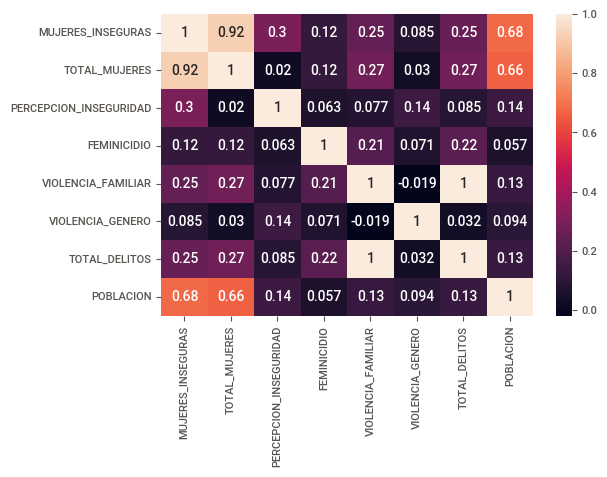

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt

# Correlación de Pearson
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
print("Correlación de Pearson")
plt.show()

In [52]:
import plotly.express as px
fig = px.scatter(df, x="PERCEPCION_INSEGURIDAD", y="VIOLENCIA_GENERO",
                title='Percepción de inseguridad vs cantidad de delitos')
fig.update_layout(width=500,
                  height=400
)
fig.show()

#### Sonora

In [53]:
df_sonora = df[df['ESTADO'] == 'Sonora']
df_sonora.head()

,ESTADO,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,TRIMESTRES,PERCEPCION_INSEGURIDAD,FEMINICIDIO,VIOLENCIA_FAMILIAR,VIOLENCIA_GENERO,TOTAL_DELITOS,POBLACION,FECHA
115,Sonora,Cajeme,127,134,2022-Q1,94776.119403,0.000000,47.375336,0.0,47.375336,428493,2022-01-01
116,Sonora,Hermosillo,99,153,2022-Q1,64705.882353,0.116223,47.767480,0.0,47.883703,860418,2022-01-01
117,Sonora,Nogales,74,129,2022-Q1,57364.341085,0.000000,65.005238,0.0,65.005238,241519,2022-01-01
274,Sonora,Cajeme,120,129,2022-Q2,93023.255814,0.000000,53.909866,0.0,53.909866,428493,2022-04-01
275,Sonora,Hermosillo,97,150,2022-Q2,64666.666667,0.116223,50.789268,0.0,50.905490,860418,2022-04-01


In [54]:
fig = px.line(df_sonora, x="FECHA", y="PERCEPCION_INSEGURIDAD", color="MUNICIPIO",
              title='Tendencia de percepción de inseguridad')
fig.update_layout(width=500, height=400)
fig.show()

In [55]:
fig = px.line(df_sonora, x="FECHA", y="TOTAL_DELITOS", color="MUNICIPIO",
              title='Tendencia de delitos')
fig.update_layout(width=500, height=400)
fig.show()

In [56]:
fig = px.scatter(df_sonora, x="PERCEPCION_INSEGURIDAD", y="TOTAL_DELITOS", color="MUNICIPIO",
                title='Percepción de inseguridad vs cantidad de delitos')
fig.update_layout(width=500,
                  height=400
)
fig.show()

## La historia que quiero contar

Según los resultados del análisis exploratorio de datos, se puede plasmar en el tablero la no relación entre las variables de percepción de inseguridad de las mujeres y los delitos de violencia de género, a través de los trimestres del año y por estados.

Nuestro objetivo es que disminuya la percepción de violencia, pues a pesar de que disminuyen los delitos esta aumenta, por tanto se puede definir como KPI:

**1.** "Percepción de inseguridad en el trimestre anterior vs Percepcion de inseguridad"

Aunque también es nuestro objetivo que disminuyan los delitos a traves de los trimestres, y que la seguridad se beneficie.

**2.** "Cantidad de delitos en el trimestre anterior vs Cantidad de delitos"

### Tablero

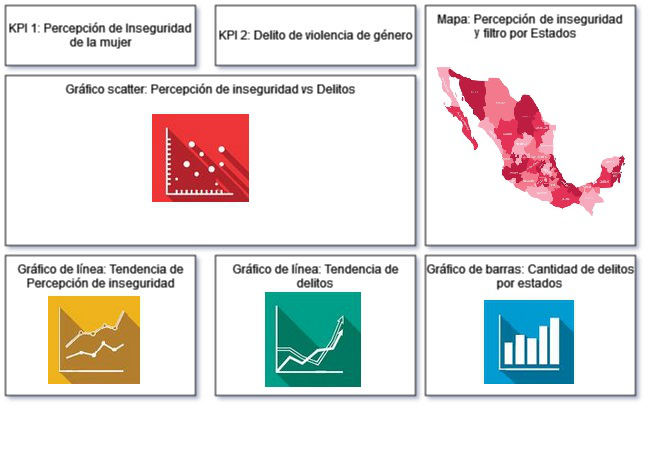

In [58]:
import IPython.display as display
from PIL import Image
display.display(Image.open('tablero.jpg'))
